In [1]:
###: Importing H2O Library

In [2]:
import h2o

In [3]:
###: Initializing h2O

In [4]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 3 hours 19 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month and 1 day
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,2.843 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [5]:
### : Getting H2O Cluster status

In [6]:
h2o.cluster().show_status()

H2O cluster uptime:,1 day 3 hours 19 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month and 1 day
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,2.843 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
###: Importing Dataset

In [8]:
df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/titanic_list.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
###: Understanding Dataset

In [10]:
df.describe()

Rows:1309
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,int,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,0.0,NaN,,0.1667,0.0,0.0,680.0,0.0,,,1.0,1.0,
mean,2.294881589,0.381970970206,NaN,,29.8811345124,0.498854087089,0.385026737968,249039.136886,33.2954792813,,,9.40452261307,160.809917355,
maxs,3.0,1.0,NaN,,80.0,8.0,9.0,3101298.0,512.3292,,,16.0,328.0,
sigma,0.83783601897,0.486055170866,NaN,,14.4134996999,1.0416583906,0.86556027535,442685.317677,51.7586682392,,,4.3574169836,97.696921996,
zeros,0,809,0,,0,891,1002,0,17,,,0,0,
missing,0,0,0,0,263,0,0,352,1,1014,2,911,1188,564
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [11]:
###: Understanding Dataset with pylab library

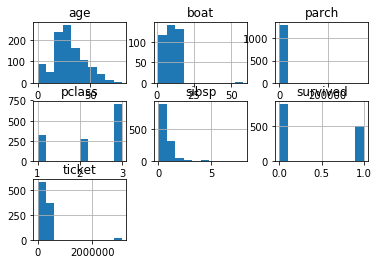

In [12]:
import pylab as pl
pl.figure(figsize=(20,10))
df.as_data_frame().hist()
pl.show()

In [13]:
###: Getting a list of columns in our dataset

In [14]:
df.col_names

[u'pclass',
 u'survived',
 u'name',
 u'sex',
 u'age',
 u'sibsp',
 u'parch',
 u'ticket',
 u'fare',
 u'cabin',
 u'embarked',
 u'boat',
 u'body',
 u'home.dest']

In [15]:
###: Setting Response column

In [16]:
response = "survived"

In [17]:
###: Setting Response column to factor so we can get unique values in it

In [18]:
df['survived'].asfactor().levels()

[['0', '1']]

In [19]:
###: Setting Response column to factor so we can build classification model

In [20]:
df[response] = df[response].asfactor()

In [21]:
###: Verifying Response column as factor 

In [22]:
df[response].describe()

Rows:1309
Cols:1




,survived
type,enum
mins,
mean,
maxs,
sigma,
zeros,
missing,0
0,1
1,1
2,0


In [23]:
###: spliting the dataset into train, test and validation  

In [24]:
train, valid, test = df.split_frame(ratios=[0.8,0.1])
print(train.shape)
print(valid.shape)
print(test.shape)

(1055, 14)
(123, 14)
(131, 14)


In [25]:
###: Setting all columns/features into a local variable

In [26]:
features = df.col_names

In [27]:
###: Settings all features for model building

In [28]:
features.remove(response)
print(features)

[u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [29]:
###: Ignoring list of features which are not required for model building

In [30]:
ignore_list = ['name', 'ticket', 'home.dest']
for x in ignore_list:
    features.remove(x)
print(features)    

[u'pclass', u'sex', u'age', u'sibsp', u'parch', u'fare', u'cabin', u'embarked', u'boat', u'body']


In [31]:
###: Importing H2O XGBoost Library

In [32]:
from h2o.estimators.xgboost import H2OXGBoostEstimator

In [33]:
###: Setting XGBooost Parameters

In [34]:
param = {
      "ntrees" : 100
    , "max_depth" : 10
    , "learn_rate" : 0.02
    , "sample_rate" : 0.7
    , "col_sample_rate_per_tree" : 0.9
    , "min_rows" : 5
    , "seed": 4241
    , "score_tree_interval": 100
}

In [35]:
###: Setting H2O XGBoost model configuration (default)

In [36]:
titanic_xgb = H2OXGBoostEstimator(**param)

In [37]:
###: Training H2O XGBoost model 

In [38]:
titanic_xgb.train(x = features, y = response, training_frame = train, validation_frame = valid)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [39]:
###: understanding the model metrics and various detials

In [40]:
titanic_xgb

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1511234431789_17142


ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0550302541431
RMSE: 0.234585281173
LogLoss: 0.218139439376
Mean Per-Class Error: 0.071959553052
AUC: 0.98279696494
Gini: 0.96559392988
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.376370042562: 


,0,1,Error,Rate
0,648.0,15.0,0.0226,(15.0/663.0)
1,49.0,343.0,0.125,(49.0/392.0)
Total,697.0,358.0,0.0607,(64.0/1055.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3763700,0.9146667,124.0
max f2,0.2160099,0.9304603,198.0
max f0point5,0.4508513,0.9526559,105.0
max accuracy,0.4117788,0.9393365,113.0
max precision,0.9352538,1.0,0.0
max recall,0.1441573,1.0,271.0
max specificity,0.9352538,1.0,0.0
max absolute_mcc,0.4117788,0.8711276,113.0
max min_per_class_accuracy,0.2933851,0.9158163,157.0
max mean_per_class_accuracy,0.3572063,0.9280404,128.0


Gains/Lift Table: Avg response rate: 37.16 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104265,0.9339859,2.6913265,2.6913265,1.0,1.0,0.0280612,0.0280612,169.1326531,169.1326531
,2,0.0208531,0.9334347,2.6913265,2.6913265,1.0,1.0,0.0280612,0.0561224,169.1326531,169.1326531
,3,0.0303318,0.9330706,2.6913265,2.6913265,1.0,1.0,0.0255102,0.0816327,169.1326531,169.1326531
,4,0.0407583,0.9325710,2.6913265,2.6913265,1.0,1.0,0.0280612,0.1096939,169.1326531,169.1326531
,5,0.0502370,0.9321241,2.6913265,2.6913265,1.0,1.0,0.0255102,0.1352041,169.1326531,169.1326531
,6,0.1004739,0.9290313,2.6913265,2.6913265,1.0,1.0,0.1352041,0.2704082,169.1326531,169.1326531
,7,0.1507109,0.9174753,2.6913265,2.6913265,1.0,1.0,0.1352041,0.4056122,169.1326531,169.1326531
,8,0.2,0.9108918,2.6913265,2.6913265,1.0,1.0,0.1326531,0.5382653,169.1326531,169.1326531
,9,0.3004739,0.5649419,2.6405468,2.6743466,0.9811321,0.9936909,0.2653061,0.8035714,164.0546785,167.4346552
,10,0.4,0.2704226,1.2046890,2.3086735,0.4476190,0.8578199,0.1198980,0.9234694,20.4689018,130.8673469




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.058269534452
RMSE: 0.241390833405
LogLoss: 0.228185908405
Mean Per-Class Error: 0.0678433535576
AUC: 0.977109762824
Gini: 0.954219525648
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35921356082: 


,0,1,Error,Rate
0,73.0,1.0,0.0135,(1.0/74.0)
1,6.0,43.0,0.1224,(6.0/49.0)
Total,79.0,44.0,0.0569,(7.0/123.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3592136,0.9247312,41.0
max f2,0.2771192,0.9288538,54.0
max f0point5,0.5732223,0.9569378,37.0
max accuracy,0.3592136,0.9430894,41.0
max precision,0.9337968,1.0,0.0
max recall,0.1338609,1.0,81.0
max specificity,0.9337968,1.0,0.0
max absolute_mcc,0.3592136,0.8824835,41.0
max min_per_class_accuracy,0.3180600,0.9183673,46.0
max mean_per_class_accuracy,0.3180600,0.9321566,46.0


Gains/Lift Table: Avg response rate: 39.84 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0162602,0.9333446,2.5102041,2.5102041,1.0,1.0,0.0408163,0.0408163,151.0204082,151.0204082
,2,0.0243902,0.9328335,2.5102041,2.5102041,1.0,1.0,0.0204082,0.0612245,151.0204082,151.0204082
,3,0.0325203,0.9326635,2.5102041,2.5102041,1.0,1.0,0.0204082,0.0816327,151.0204082,151.0204082
,4,0.0406504,0.9324100,2.5102041,2.5102041,1.0,1.0,0.0204082,0.1020408,151.0204082,151.0204082
,5,0.0569106,0.9321803,2.5102041,2.5102041,1.0,1.0,0.0408163,0.1428571,151.0204082,151.0204082
,6,0.1056911,0.9301516,2.5102041,2.5102041,1.0,1.0,0.1224490,0.2653061,151.0204082,151.0204082
,7,0.1544715,0.9246670,2.5102041,2.5102041,1.0,1.0,0.1224490,0.3877551,151.0204082,151.0204082
,8,0.2032520,0.9146419,2.5102041,2.5102041,1.0,1.0,0.1224490,0.5102041,151.0204082,151.0204082
,9,0.3008130,0.8874592,2.5102041,2.5102041,1.0,1.0,0.2448980,0.7551020,151.0204082,151.0204082
,10,0.3983740,0.3169402,1.6734694,2.3052895,0.6666667,0.9183673,0.1632653,0.9183673,67.3469388,130.5289463



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2017-11-21 22:39:53,0.003 sec,0.0,0.5,0.6931472,0.5,1.0,0.6284360,0.5,0.6931472,0.5,1.0,0.6016260
,2017-11-21 22:39:53,0.109 sec,100.0,0.2345853,0.2181394,0.9827970,2.6913265,0.0606635,0.2413908,0.2281859,0.9771098,2.5102041,0.0569106


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
fare,653.0,1.0,0.3572210
age,440.0,0.6738132,0.2407002
boat,168.0,0.2572741,0.0919037
sex,151.0,0.2312404,0.0826039
embarked,103.0,0.1577335,0.0563457
cabin,99.0,0.1516080,0.0541575
sibsp,72.0,0.1102603,0.0393873
pclass,62.0,0.0949464,0.0339168
parch,49.0,0.0750383,0.0268053
body,31.0,0.0474732,0.0169584


In [41]:
###: XGBoost model performance on validation data

In [42]:
titanic_xgb.model_performance(valid=True)


ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.058269534452
RMSE: 0.241390833405
LogLoss: 0.228185908405
Mean Per-Class Error: 0.0678433535576
AUC: 0.977109762824
Gini: 0.954219525648
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35921356082: 


,0,1,Error,Rate
0,73.0,1.0,0.0135,(1.0/74.0)
1,6.0,43.0,0.1224,(6.0/49.0)
Total,79.0,44.0,0.0569,(7.0/123.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3592136,0.9247312,41.0
max f2,0.2771192,0.9288538,54.0
max f0point5,0.5732223,0.9569378,37.0
max accuracy,0.3592136,0.9430894,41.0
max precision,0.9337968,1.0,0.0
max recall,0.1338609,1.0,81.0
max specificity,0.9337968,1.0,0.0
max absolute_mcc,0.3592136,0.8824835,41.0
max min_per_class_accuracy,0.3180600,0.9183673,46.0
max mean_per_class_accuracy,0.3180600,0.9321566,46.0


Gains/Lift Table: Avg response rate: 39.84 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0162602,0.9333446,2.5102041,2.5102041,1.0,1.0,0.0408163,0.0408163,151.0204082,151.0204082
,2,0.0243902,0.9328335,2.5102041,2.5102041,1.0,1.0,0.0204082,0.0612245,151.0204082,151.0204082
,3,0.0325203,0.9326635,2.5102041,2.5102041,1.0,1.0,0.0204082,0.0816327,151.0204082,151.0204082
,4,0.0406504,0.9324100,2.5102041,2.5102041,1.0,1.0,0.0204082,0.1020408,151.0204082,151.0204082
,5,0.0569106,0.9321803,2.5102041,2.5102041,1.0,1.0,0.0408163,0.1428571,151.0204082,151.0204082
,6,0.1056911,0.9301516,2.5102041,2.5102041,1.0,1.0,0.1224490,0.2653061,151.0204082,151.0204082
,7,0.1544715,0.9246670,2.5102041,2.5102041,1.0,1.0,0.1224490,0.3877551,151.0204082,151.0204082
,8,0.2032520,0.9146419,2.5102041,2.5102041,1.0,1.0,0.1224490,0.5102041,151.0204082,151.0204082
,9,0.3008130,0.8874592,2.5102041,2.5102041,1.0,1.0,0.2448980,0.7551020,151.0204082,151.0204082
,10,0.3983740,0.3169402,1.6734694,2.3052895,0.6666667,0.9183673,0.1632653,0.9183673,67.3469388,130.5289463


In [43]:
titanic_xgb.model_performance(valid=True).auc()

0.9771097628240486

In [44]:
###: Plotting XGBoost  Model for its AUC metric 

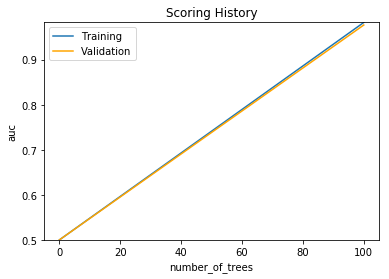

In [45]:
titanic_xgb.plot(metric='auc')

In [46]:
###: Generating Variable Importance Plot for the XGBoost Model

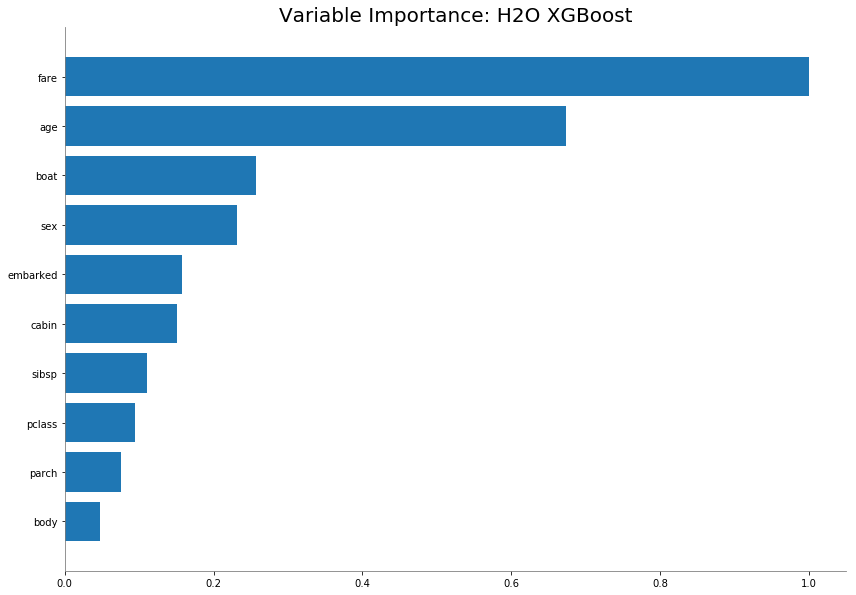

In [47]:
titanic_xgb.varimp_plot()

In [48]:
###:  H2O XGBoost Scoring History

In [49]:
titanic_xgb.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
0,,2017-11-21 22:39:53,0.003 sec,0.0,0.500000,0.693147,0.500000,1.000000,0.628436,0.500000,0.693147,0.50000,1.000000,0.601626
1,,2017-11-21 22:39:53,0.109 sec,100.0,0.234585,0.218139,0.982797,2.691327,0.060664,0.241391,0.228186,0.97711,2.510204,0.056911


In [50]:
### PERFORMING PREDICTIONS USING a TEST DATA SET with Auto ML Leader model

In [51]:
titanic_xgb.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


C1,C2,C3
Y,0.0651911,0.934809
Y,0.0682997,0.9317
Y,0.0805899,0.91941
Y,0.0694779,0.930522
Y,0.0682817,0.931718
N,0.801989,0.198011
Y,0.0692173,0.930783
Y,0.0686461,0.931354
Y,0.0691801,0.93082
Y,0.0677248,0.932275


In [52]:
###: Getting AUC metrics from the test data using XGBoost Leader Model

In [53]:
titanic_xgb.model_performance(test_data=test).auc()

0.9646892655367232